In [2]:
# import all the lib
import tensorflow
import matplotlib.pyplot as plt
from matplotlib import pyplot

from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import mnist

In [3]:
# loading the dataset
(X_train , y_train) , (X_test , y_test ) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


1. In above output 60000 data for training and 10000 for testing
2. 28 rown and 28 columns
3. Total 70000 images

In [5]:
X_train[0]


# output -->>images in numbers 0 to 255
# 0 --> white image and nearby 255 -->>black image so from 0 to 255 images color intensity will be increase from grey to black 
# Means we have the dataset of grey scale i.e black n white images

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

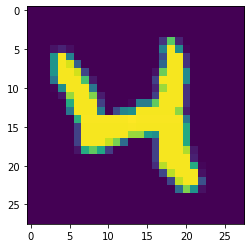

In [6]:
# visualisating the image data

plt.imshow(X_train[20])



# output>> image converted into pixels from numbers and image is not clear bcos its resolution is 28 * 28 pixels

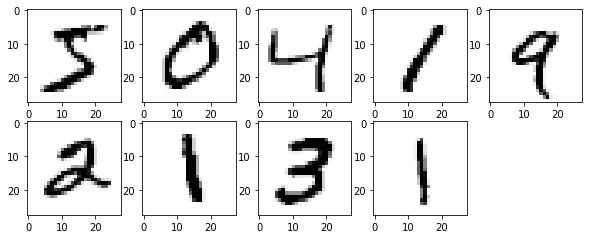

In [7]:
# plot first few images
plt.figure(figsize=(10,10))
for i in range(9):
	# define subplot
	 plt.subplot(5,5,i+1)
	# plot raw pixel data
	 plt.imshow(X_train[i] , cmap='Greys')
  

  # plt.subplot(330+1+i)

In [8]:
# reshape dataset to have a single channel

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [9]:
# Feature scaling
# nomralise the image --->>range is 0-255 ->>converting the images into 0 to 1 range
# It will make the process very easy and fast so that out neural network can easily learn the data

X_train = X_train/255 
X_test = X_test/255

In [11]:
# Now build the neural network 

1. model architecture
2. compile
3. fit or train the model

In [12]:
# 1. Model architecture

model = Sequential()


# conv layer 1
model.add(Conv2D(10 , 3 , activation='relu' , kernel_initializer='he_normal' , input_shape = (28,28,1)))     
model.add(MaxPool2D())     #pool

# conv layer 2
model.add(Conv2D(20 , 3 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# conv layer 3
model.add(Conv2D(40 , 3 , activation='relu' , kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# flatten
model.add(Flatten())
# As we have 2D image so Flattening is converting the data into a 1-dimensional array for inputting it to the next layer.
# Flattening is merging all visible layers into the background layer to reduce file size.

# hidden layer 1
model.add(Dense(128, activation='sigmoid'))

# hidden layer 2
model.add(Dense(64, activation='relu'))

# hidden layer 3
model.add(Dense(32, activation='sigmoid'))

#output
model.add(Dense(10, activation='softmax'))         # we take 10 neurons bcos we have 10 classes of numbers (0-9)


# Relu ---> If our neural network will give the output so we get +ve values as well as -ve values so this relu func will take +ve values as +ve and (0 , -ve) values will give as 0 value
          # output will give the probability with 10 classes of numbers
# Relu will take all the +ve inputs and cancel -ve inputs

# Dense -->> It insure that each neuron in the previous layer is connected to every neuron in next layer so basically we are creating a fully connected neural network.
# model.add(Dense(128, activation='sigmoid')) -->>>128 neurons

# softmax -->> lets say we have 10 outputs classes , for each class the prob will be send as the output between 0 to 1 so all the neurons will give the 
              # output into prob and 1 with the max prob will be picked 



In [13]:
# 2.compile

model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])


# adam -->>> modified version of gradient descent algorithm
# sparse_categorical_crossentropy --->>becos we are going to perform classification problems(10 class)
# binary_crossentropy -->> binary class problems

In [14]:
# 3. fit or train the model

model.fit(X_train , y_train , epochs= 5 , batch_size=32)

# epochs means iteraions
# epochs = 1 -->> means lets suppose we have 60000 images so 1 epochs means 60000 images will come to our neural network n will train on dataset and 
# if we want that our neural network will be good learn then we will increase the epochs values -->> suppose epochs values we wil take 5 then complete dataset will 
# come on neural networks and then neural network will train on complete dataset and the again will come whole dataset n will trained 
# so iteration will be done for 5 times so that our accuracy will be be better bcos of increasing the epochs

Epoch 1/5
1875/1875 [==============================] - 37s 4ms/step - loss: 0.5255 - accuracy: 0.8584
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1521 - accuracy: 0.9559
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1096 - accuracy: 0.9686
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0903 - accuracy: 0.9726
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0774 - accuracy: 0.9764


In [15]:
# test and evaluate the model

model.evaluate(X_test , y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9786


[0.0743432492017746, 0.978600025177002]

In [ ]:
# In above output -->>
# accuracy of training 97% and testing acc 97%
# both accuracy are close to each other so we can say that our model is not overfitting and we can deploy it now.

In [16]:
#  Predict the data

y_pred = model.predict(X_test)

In [17]:
y_pred[0]

# output -->> we got the output value in probability form of 10 classes

array([1.4483051e-04, 1.5677603e-04, 2.7929861e-04, 3.5909005e-04,
       1.7877700e-04, 2.6141290e-06, 3.2111677e-06, 9.9848700e-01,
       2.6548969e-05, 3.6184723e-04], dtype=float32)

In [18]:
# 9.9820650e-01 -- >>for 7th class or 7th index our model predict 98 % probability

import numpy as np
print(np.argmax(y_pred[0]))


# np.argmax() -->> it will tell us on which index we have max prob value and it will give us that index
# As we can see that we got 7 in output so it is clear that we hav max prob value at 7th index i.e in above we got 98% in 7th index.

# in above class we can see that on 7th index

7


In [19]:
# Lets check in actual what is the value of 1st image

y_test[0]


#  Here also we got value 7th index and our model also predict above(np.argmax(y_pred[0])) same 7th index so that means our prediction is working good.

7

In [20]:
# lets see the single image prediction-->>>

image_row = 100
print(np.argmax(y_pred[image_row]))

6


6


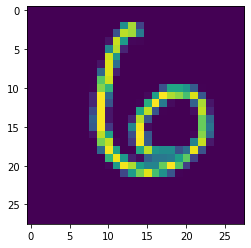

In [21]:
# testing the prediction

plt.imshow((np.squeeze(X_test[image_row])))
print(y_test[image_row])

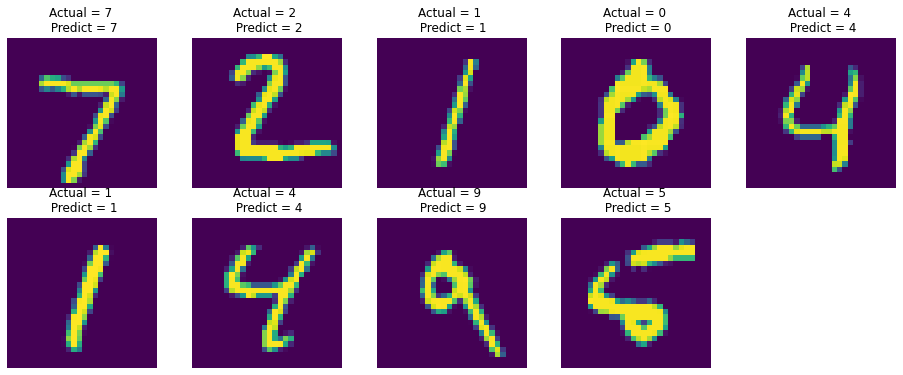

In [27]:
plt.figure(figsize=(16,16))
for i in range(9):
  plt.subplot(5,5,i+1)
  plt.imshow((np.squeeze(X_test[i])))
  plt.axis('off')
  plt.title('Actual = {} \n Predict = {}'.format((y_test[i]) ,np.argmax(y_pred[i])))

In [28]:
#  Save the model

model.save('MNIST_classifier.h5')

In [29]:
#  Next step will be load the model

load_model = tensorflow.keras.models.load_model('/content/MNIST_classifier.h5')

In [30]:
load_model.predict(X_test)

array([[1.4483051e-04, 1.5677603e-04, 2.7929861e-04, ..., 9.9848700e-01,
        2.6548969e-05, 3.6184723e-04],
       [1.1131496e-03, 3.1128436e-04, 9.9457550e-01, ..., 1.1305691e-03,
        1.1526472e-03, 1.8727063e-04],
       [3.6604801e-05, 9.9925250e-01, 8.6836757e-05, ..., 1.7210329e-04,
        1.1534684e-04, 9.1160791e-06],
       ...,
       [2.7408931e-05, 1.1915853e-05, 5.8150792e-05, ..., 2.5624636e-04,
        1.0767648e-04, 7.6592510e-04],
       [4.0528562e-04, 1.2428788e-05, 2.2716822e-05, ..., 2.3790944e-06,
        5.0258171e-04, 2.2676574e-04],
       [5.9207791e-04, 3.9342151e-05, 1.2063589e-06, ..., 4.3571440e-06,
        4.8317356e-04, 2.6227974e-05]], dtype=float32)